In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [8]:
start = '2012-01-01'
end = '2024-03-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [12]:
data.reset_index(inplace=True)

In [13]:
data

,level_0,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.554291,147611217
1,1,1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.625692,114989399
2,2,2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.395069,131808205
3,3,3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.171415,108119746
4,4,4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.485767,233776981
...,...,...,...,...,...,...,...,...,...
3068,3068,3068,2024-03-14,142.300003,144.729996,141.485001,144.339996,144.175934,36117900
3069,3069,3069,2024-03-15,143.410004,144.339996,141.130005,142.169998,142.008392,41025900
3070,3070,3070,2024-03-18,149.369995,152.929993,148.139999,148.479996,148.311218,47676700
3071,3071,3071,2024-03-19,148.979996,149.619995,147.009995,147.919998,147.751862,17748400


In [17]:
ma_100_days = data.Close.rolling(100).mean()

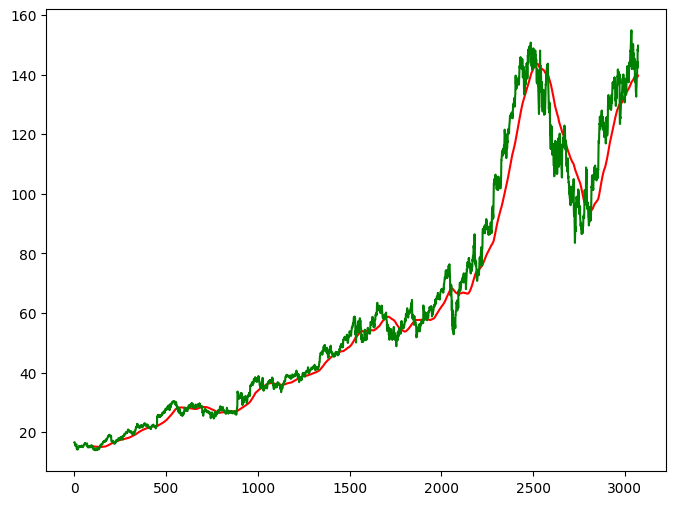

In [18]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [20]:
ma_200_days=data.Close.rolling(200).mean()

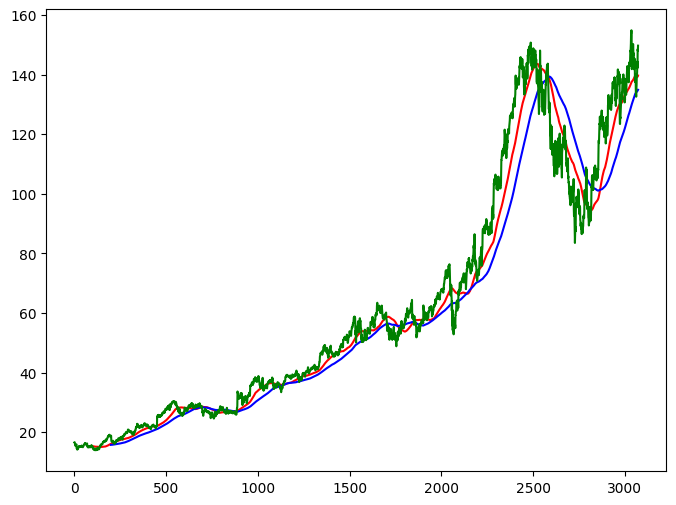

In [21]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [22]:
data.dropna(inplace=True)

In [23]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [24]:
data_train.shape[0]

2458

In [25]:
data_test.shape[0]

615

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [28]:
data_train_scale = scaler.fit_transform(data_train)

In [29]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [30]:
x, y = np.array(x), np.array(y)

In [32]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [34]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))
model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [35]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [36]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 109s 886ms/step - loss: 0.0450
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 60s 801ms/step - loss: 0.0042
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 91s 923ms/step - loss: 0.0037
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 81s 911ms/step - loss: 0.0033
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 71s 749ms/step - loss: 0.0028
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 27s 361ms/step - loss: 0.0029
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 41s 357ms/step - loss: 0.0029
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 41s 361ms/step - loss: 0.0026
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 41s 362ms/step - loss: 0.0027
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 41s 358ms/step - loss: 0.0022
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 42s 365ms/step - loss: 0.0026
Epoch 12/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 41s 359ms/step - loss: 0.0027
Epoch 13/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 41s 359ms/step - loss: 0.0020
Epoch 14/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 48s 441ms/step - loss: 0.0023
Epoch 15/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 39s

In [37]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [38]:
pas_100_days = data_train.tail(100)

In [39]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [41]:
data_test_scale= scaler.fit_transform(data_test)

In [42]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [43]:
y_predict = model.predict(x)

20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 533ms/step


In [44]:
scale =1/scaler.scale_

In [45]:
y_predict = y_predict*scale

In [46]:
y = y*scale

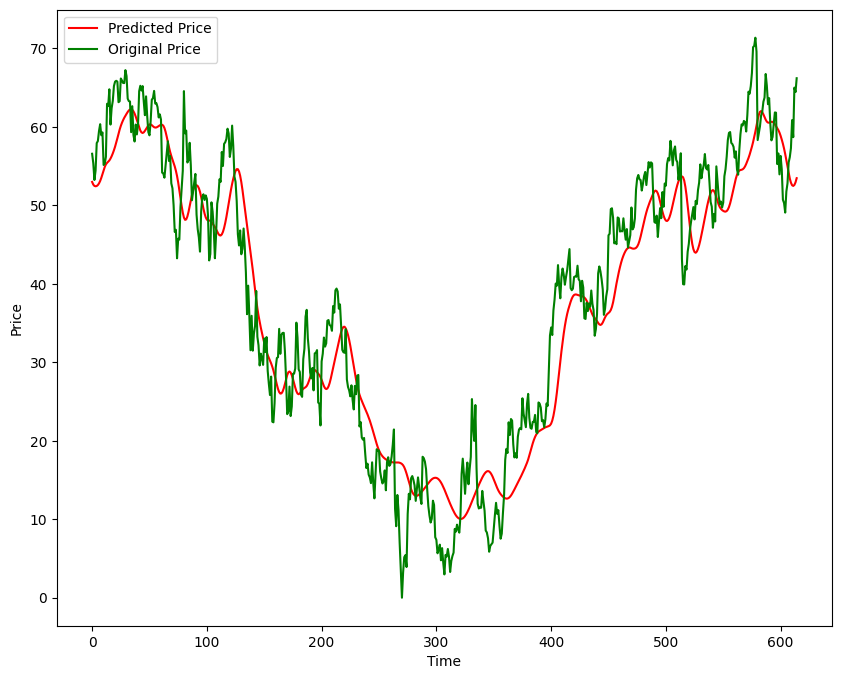

In [47]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [48]:
model.save('Stock Predictions Model.keras')